# Exploring the Model

This notebook defines some functions to construct plots of the result of model simulations. It then explores a number of different cases that are found throughout the paper.

In [1]:
%pylab inline 
import pysd
import numpy as np
import multiprocessing
from functools import partial
import seaborn

Populating the interactive namespace from numpy and matplotlib


/Users/houghton/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Load the model
model = pysd.read_vensim('Three streamsc.mdl')
model.set_components({'final_time':36})
retcols = ['tier_1_clients',
           'tier_2_clients',
           'tier_3_clients',
           'tier_1_leads',
           'tier_2_leads',
           'tier_3_leads',
           'tier_1_income',
           'tier_2_income',
           'tier_3_income',
           'income',
           'months_of_buffer']

In [3]:
def plots(result, title=''):
    plt.figure(figsize=(6*1.5,3.5*1.5))
    plt.subplot(3,1,1)
    plt.plot(result.index, result['tier_1_clients'], label='Tier 1 Clients')
    plt.plot(result.index, result['tier_2_clients'], label='Tier 2 Clients')
    plt.plot(result.index, result['tier_3_clients'], label='Tier 3 Clients')
    plt.legend(frameon=False, ncol=1, loc='lower right', fontsize=16)
    plt.ylabel('Clients', fontsize=16)
    plt.xticks(alpha=0)
    plt.yticks(range(0,100,20), fontsize=14)
    plt.xlim(0,36)
    plt.ylim(0,85)
    plt.title(title, fontsize=16)

    plt.subplot(3,1,2)
    plt.plot(result.index, result['tier_1_leads'], label='Tier 1 Leads')
    plt.plot(result.index, result['tier_2_leads'], label='Tier 2 Leads')
    plt.plot(result.index, result['tier_3_leads'], label='Tier 3 Leads')
    plt.legend(frameon=False, ncol=1, loc='lower right', fontsize=16)
    plt.ylabel('Leads', fontsize=16)
    plt.xticks(alpha=0)
    plt.yticks(range(0,100,20), fontsize=14)
    plt.xlim(0,36)
    plt.ylim(0,85)
    
    plt.subplot(3,1,3)
    plt.plot(result.index, result['months_of_buffer'])
    plt.ylabel('Months of Buffer', fontsize=16)
    plt.ylim(0,18)
    plt.xlim(0,36)
    plt.yticks(range(0,21,3), fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel('Months', fontsize=16)
    

In [4]:
def plots4(result, title=''):
    plt.figure(figsize=(10,8))
    plt.subplot(4,1,1)
    plt.plot(result.index, result['tier_1_clients'], label='Tier 1 Clients')
    plt.plot(result.index, result['tier_2_clients'], label='Tier 2 Clients')
    plt.plot(result.index, result['tier_3_clients'], label='Tier 3 Clients')
    plt.legend(frameon=False, ncol=1, loc='center right', fontsize=16)
    plt.ylabel('Clients', fontsize=16)
    plt.xticks(alpha=0)
    plt.yticks(range(0,100,20), fontsize=14)
    plt.xlim(0,36)
    plt.ylim(0,85)
    plt.title(title, fontsize=16)

    plt.subplot(4,1,2)
    plt.plot(result.index, result['tier_1_leads'], label='Tier 1 Leads')
    plt.plot(result.index, result['tier_2_leads'], label='Tier 2 Leads')
    plt.plot(result.index, result['tier_3_leads'], label='Tier 3 Leads')
    plt.legend(frameon=False, ncol=1, loc='center right', fontsize=16)
    plt.ylabel('Leads', fontsize=16)
    plt.xticks(alpha=0)
    plt.yticks(range(0,100,20), fontsize=14)
    plt.xlim(0,36)
    plt.ylim(0,85)
    
    plt.subplot(4,1,3)
    plt.plot(result.index, result['tier_1_income'], label='Tier 1 Income')
    plt.plot(result.index, result['tier_2_income'], label='Tier 2 Income')
    plt.plot(result.index, result['tier_3_income'], label='Tier 3 Income')
    plt.plot(result.index, result['income'], label='Total Income')    
    plt.legend(frameon=False, ncol=1, loc='center right', fontsize=16)
    plt.ylabel('Income', fontsize=16)
    plt.xticks(alpha=0)
    plt.yticks(np.arange(0,2.5,.5), fontsize=14)
    plt.xlim(0,36)
    plt.ylim(0,2)
    
    plt.subplot(4,1,4)
    plt.plot(result.index, result['months_of_buffer'])
    plt.ylabel('Months of Buffer', fontsize=16)
    plt.ylim(0,18)
    plt.xlim(0,36)
    plt.yticks(range(0,21,3), fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel('Months', fontsize=16)

### Base Run
Here we use the parameters as they are in the model

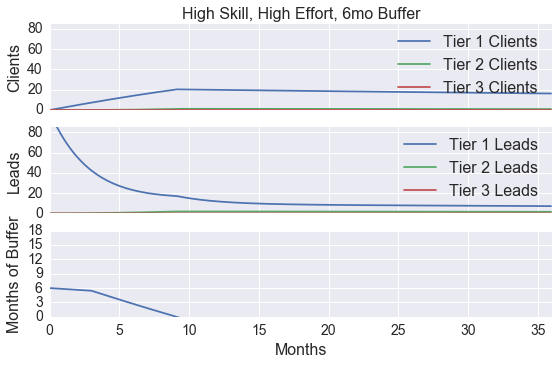

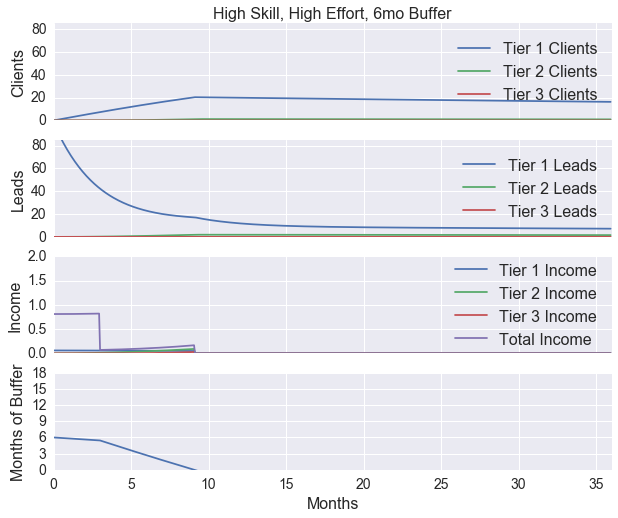

In [5]:
result = model.run(return_columns=retcols)
plots(result, 'High Skill, High Effort, 6mo Buffer')
plt.savefig('images/threec_expl_base.png')

plots4(result, 'High Skill, High Effort, 6mo Buffer')
plt.savefig('images/threec_expl_4_base.png')


### Succeed through merit

Success in this run is arived at because of the skill of the sales agent.

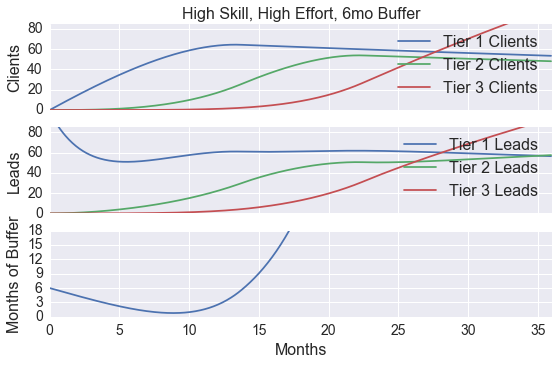

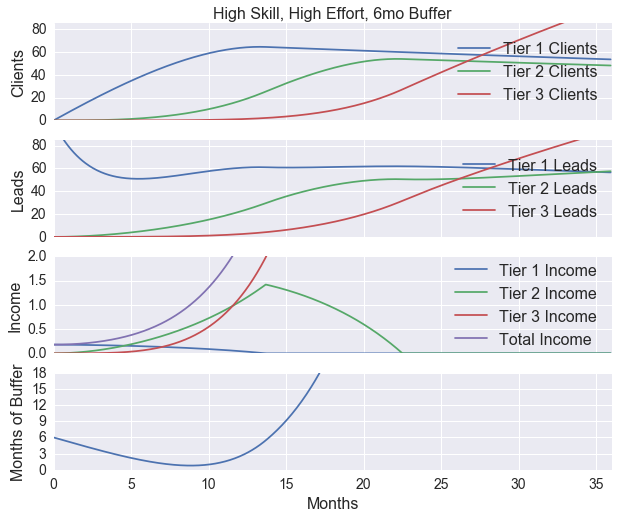

In [6]:
params = {'startup_subsidy':0,
          'startup_subsidy_length':0,
          'effort_required_to_make_a_sale':2,
          'minimum_time_to_make_a_sale':1,
          'fraction_of_effort_for_sales':.3,
          'total_effort_available':250,
          'initial_buffer':6,
          'referrals_per_meeting':4
         }
result = model.run(params=params, return_columns=retcols)
plots(result, 'High Skill, High Effort, 6mo Buffer')
plt.savefig('images/threec_expl_s_merit.png')

plots4(result, 'High Skill, High Effort, 6mo Buffer')
plt.savefig('images/threec_expl_4_s_merit.png')

### Barely Fail out - Run out of buffer

In this analysis, the agent would have succeeded as previously if they had a larger buffer.

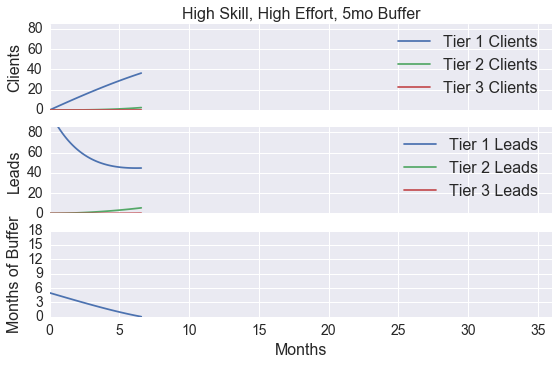

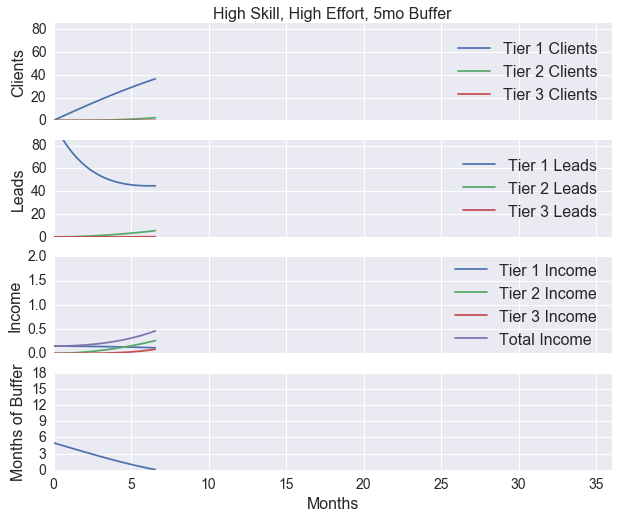

In [7]:
params = {'startup_subsidy':0,
          'startup_subsidy_length':0,
          'effort_required_to_make_a_sale':2,
          'minimum_time_to_make_a_sale':1,
          'fraction_of_effort_for_sales':.25,
          'total_effort_available':250,
          'initial_buffer':5,
          'referrals_per_meeting':4
         }
result = model.run(params=params, return_columns=retcols)
plots(result[result['months_of_buffer']>0], 'High Skill, High Effort, 5mo Buffer')
plt.savefig('images/threec_expl_f_merit_buffer.png')

plots4(result[result['months_of_buffer']>0], 'High Skill, High Effort, 5mo Buffer')
plt.savefig('images/threec_expl_4_f_merit_buffer.png')

### Succeed through existing network

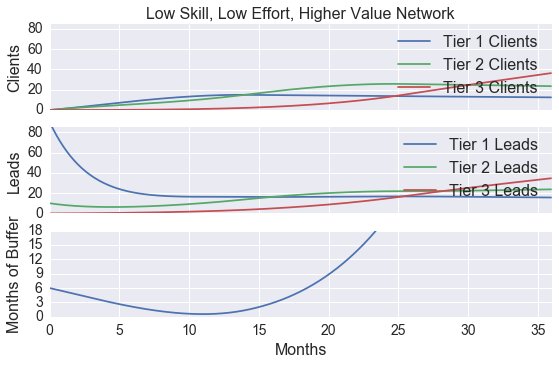

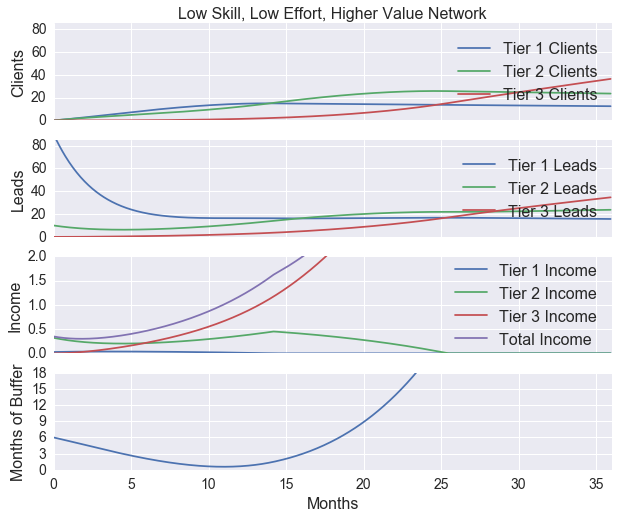

In [8]:
params = {'startup_subsidy':0,
          'startup_subsidy_length':0,
          'effort_required_to_make_a_sale':4,
          'minimum_time_to_make_a_sale':1.5,
          'fraction_of_effort_for_sales':.2,
          'initial_buffer':6,
         }
inits = {'tier_1_leads':90,
         'tier_2_leads':10,
         'tier_3_leads':0,
         'tier_1_clients':0,
         'tier_2_clients':0,
         'tier_3_clients':0,
         'months_of_buffer':6}
result = model.run(params=params, initial_condition=(0,inits), return_columns=retcols)
plots(result, 'Low Skill, Low Effort, Higher Value Network')
plt.savefig('images/threec_expl_s_network.png')

plots4(result, 'Low Skill, Low Effort, Higher Value Network')
plt.savefig('images/threec_expl_4_s_network.png')

### Succeed through buffer

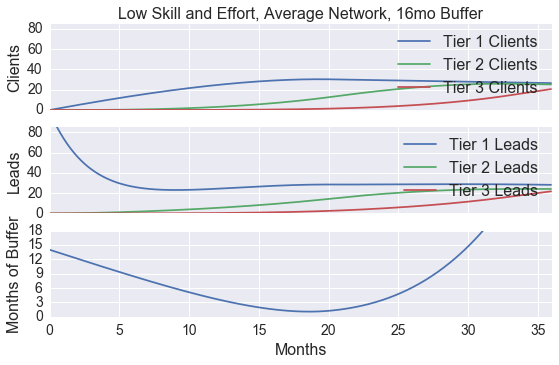

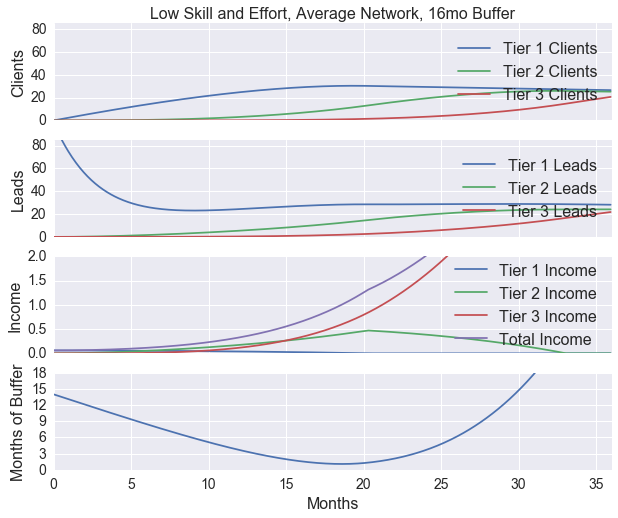

In [9]:
params = {'startup_subsidy':0,
          'startup_subsidy_length':0,
          'effort_required_to_make_a_sale':4,
          'minimum_time_to_make_a_sale':1.5,
          'fraction_of_effort_for_sales':.2,
          'initial_buffer':14
          }

result = model.run(params=params, return_columns=retcols)
plots(result,'Low Skill and Effort, Average Network, 16mo Buffer')
plt.savefig('images/threec_expl_s_buffer.png')

plots4(result,'Low Skill and Effort, Average Network, 16mo Buffer')
plt.savefig('images/threec_expl_4_s_buffer.png')

### Succeed with subsidy

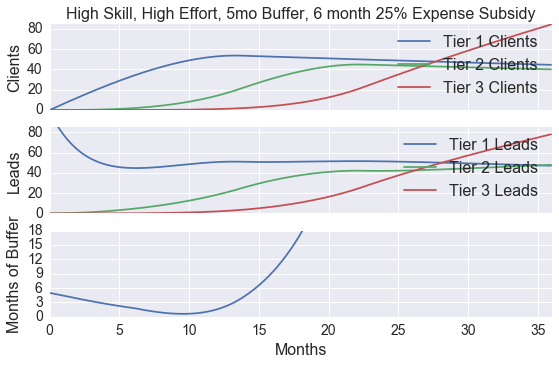

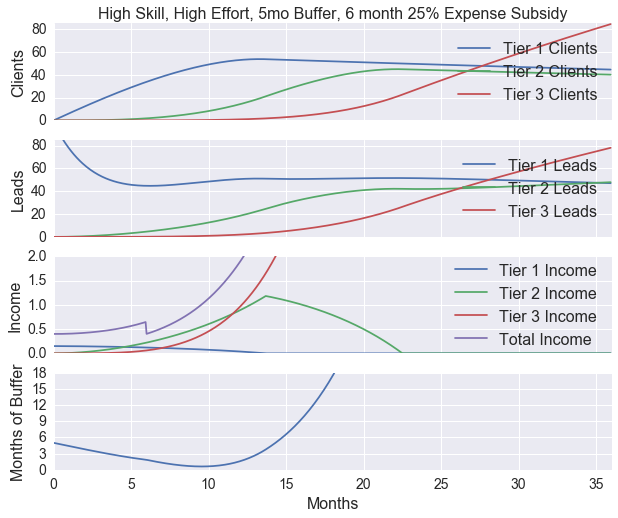

In [10]:
params = {'startup_subsidy':0.25,
          'startup_subsidy_length':6,
          'effort_required_to_make_a_sale':2,
          'minimum_time_to_make_a_sale':1,
          'fraction_of_effort_for_sales':.25,
          'total_effort_available':250,
          'initial_buffer':5,
          'referrals_per_meeting':4
         }
result = model.run(params=params, return_columns=retcols)
plots(result, 'High Skill, High Effort, 5mo Buffer, 6 month 25% Expense Subsidy')
plt.savefig('images/threec_expl_s_subsidy.png')

plots4(result, 'High Skill, High Effort, 5mo Buffer, 6 month 25% Expense Subsidy')
plt.savefig('images/threec_expl_4_s_subsidy.png')

### Succeed with overhead reduction

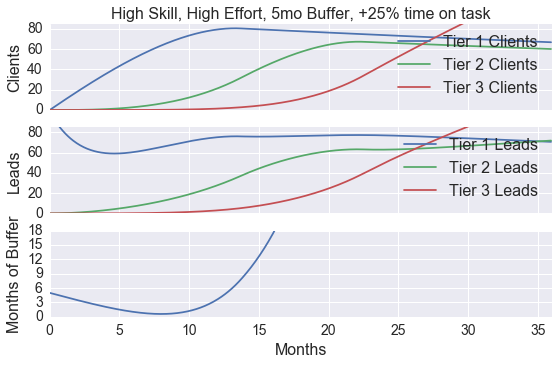

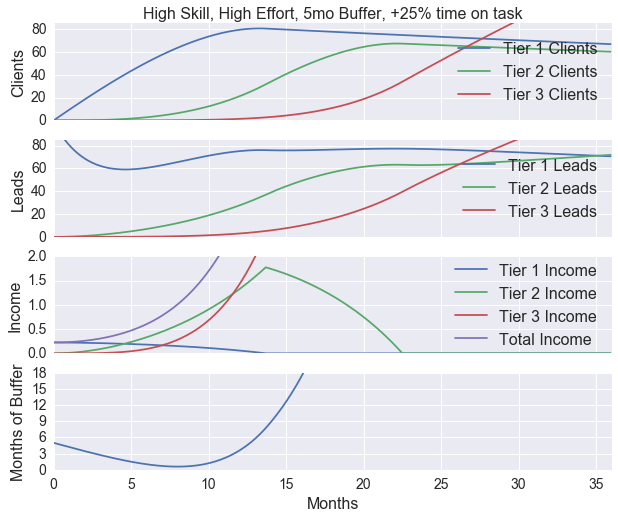

In [11]:
params = {'startup_subsidy':0,
          'startup_subsidy_length':0,
          'effort_required_to_make_a_sale':2,
          'minimum_time_to_make_a_sale':1,
          'fraction_of_effort_for_sales':.3*1.25,
          'total_effort_available':250,
          'initial_buffer':5,
          'referrals_per_meeting':4
         }
result = model.run(params=params, return_columns=retcols)
plots(result, 'High Skill, High Effort, 5mo Buffer, +25% time on task')
plt.savefig('images/threec_expl_s_efficiency.png')

plots4(result, 'High Skill, High Effort, 5mo Buffer, +25% time on task')
plt.savefig('images/threec_expl_4_s_efficiency.png')